<a href="https://colab.research.google.com/github/LuelltheVawreak/House-price-predict/blob/main/uahhhh_optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [ ]:
housing_dataset = pd.read_csv('/content/house_data.csv')
print(housing_dataset)

               id             date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000  221900         3       1.00         1180   
1      6414100192  20141209T000000  538000         3       2.25         2570   
2      5631500400  20150225T000000  180000         2       1.00          770   
3      2487200875  20141209T000000  604000         4       3.00         1960   
4      1954400510  20150218T000000  510000         3       2.00         1680   
...           ...              ...     ...       ...        ...          ...   
21608   263000018  20140521T000000  360000         3       2.50         1530   
21609  6600060120  20150223T000000  400000         4       2.50         2310   
21610  1523300141  20140623T000000  402101         2       0.75         1020   
21611   291310100  20150116T000000  400000         3       2.50         1600   
21612  1523300157  20141015T000000  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  vi

In [ ]:
housing_dataset.shape

(21613, 21)

In [ ]:

housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
housing_dataset = housing_dataset.drop('date',axis=1)
housing_dataset = housing_dataset.drop('id',axis=1)

Ki·ªÉm tra th√¥ng tin t·ªïng quan

In [ ]:
housing_dataset.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [ ]:
housing_dataset['waterfront'].value_counts()


waterfront
0    21450
1      163
Name: count, dtype: int64

In [ ]:
housing_dataset['price'].value_counts()


price
450000     172
350000     172
550000     159
500000     152
425000     150
          ... 
280400       1
118000       1
202200       1
1851000      1
320600       1
Name: count, Length: 4028, dtype: int64

ph√¢n t√≠ch d·ªØ li·ªáu  and bi·ªÉu ƒë·ªì ph√¢n ph·ªëi.

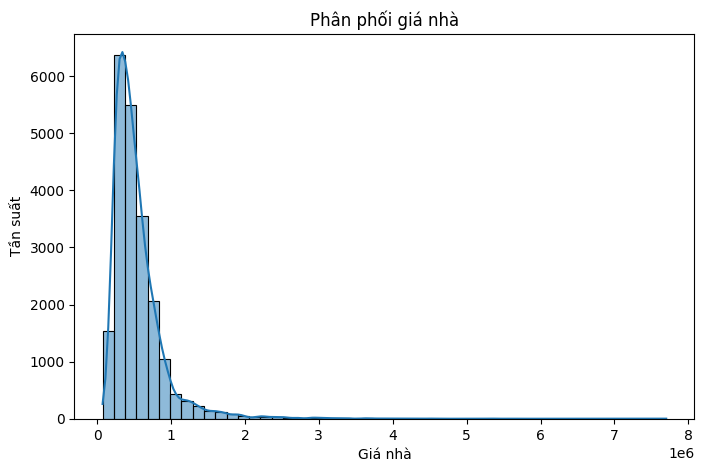

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(housing_dataset['price'], bins=50, kde=True)
plt.title("Ph√¢n ph·ªëi gi√° nh√†")
plt.xlabel("Gi√° nh√†")
plt.ylabel("T·∫ßn su·∫•t")
plt.show()

In [ ]:
print(housing_dataset.dtypes)

price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu (dtype) c·ªßa t·ª´ng c·ªôt trong DataFrame housing_dataset.

X√°c ƒë·ªãnh ki·ªÉu d·ªØ li·ªáu c·ªßa t·ª´ng c·ªôt
Ki·ªÉu d·ªØ li·ªáu s·ªë (int64, float64) ‚Üí C√≥ th·ªÉ d√πng tr·ª±c ti·∫øp trong m√¥ h√¨nh m√°y h·ªçc.

Ki·ªÉu d·ªØ li·ªáu chu·ªói (object) ‚Üí C√≥ th·ªÉ l√† d·ªØ li·ªáu danh m·ª•c (categorical) ho·∫∑c d·ªØ li·ªáu vƒÉn b·∫£n, c·∫ßn x·ª≠ l√Ω ph√π h·ª£p tr∆∞·ªõc khi hu·∫•n luy·ªán m√¥ h√¨nh.


n·∫øu c√≥ c·ªôt d·∫°ng s·ªë nh∆∞ng l∆∞u d·∫°ng chu·ªói th√¨ chuy·ªÉn ƒë·ªïi.

In [ ]:
housing_dataset["lorem"] = pd.to_numeric(housing_dataset["lorem"], errors="coerce")



# pearson

T√≠nh h·ªá s·ªë t∆∞∆°ng quan

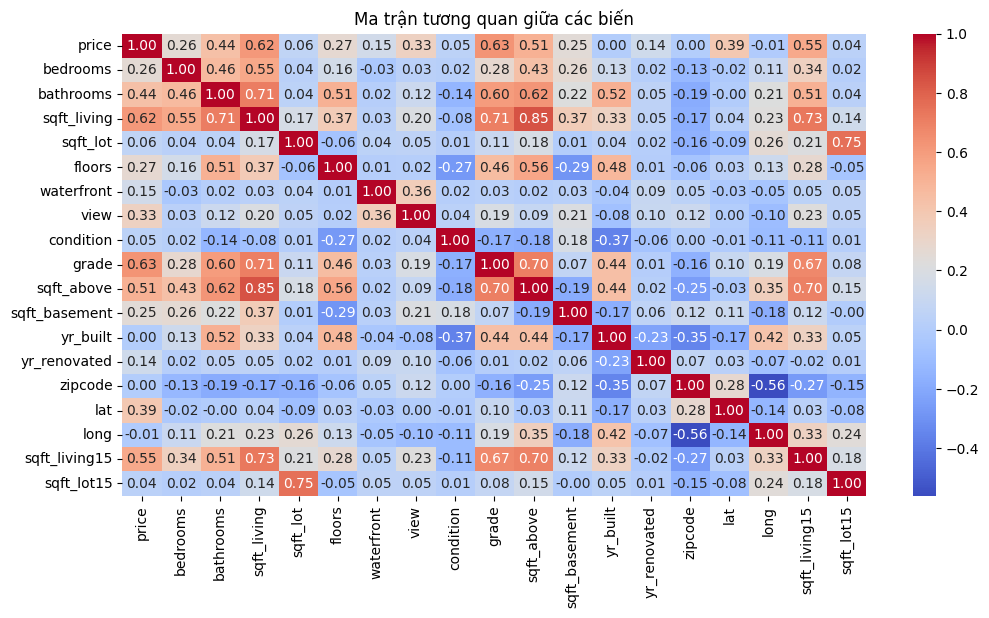

In [ ]:
correlation_matrix = housing_dataset.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn")
plt.show()


Xem m·ª©c ƒë·ªô t∆∞∆°ng quan c·ªßa t·ª´ng c·ªôt v·ªõi gi√° nh√†

In [ ]:

print(housing_dataset.corr()["price"].sort_values(ascending=False))

price            1.000000
grade            0.631661
sqft_living      0.615816
sqft_living15    0.548338
sqft_above       0.508492
bathrooms        0.435631
lat              0.394083
view             0.329511
floors           0.268755
bedrooms         0.258710
sqft_basement    0.246915
waterfront       0.149845
yr_renovated     0.135765
sqft_lot         0.063058
condition        0.047865
sqft_lot15       0.040176
zipcode          0.004665
yr_built         0.001832
long            -0.009006
Name: price, dtype: float64


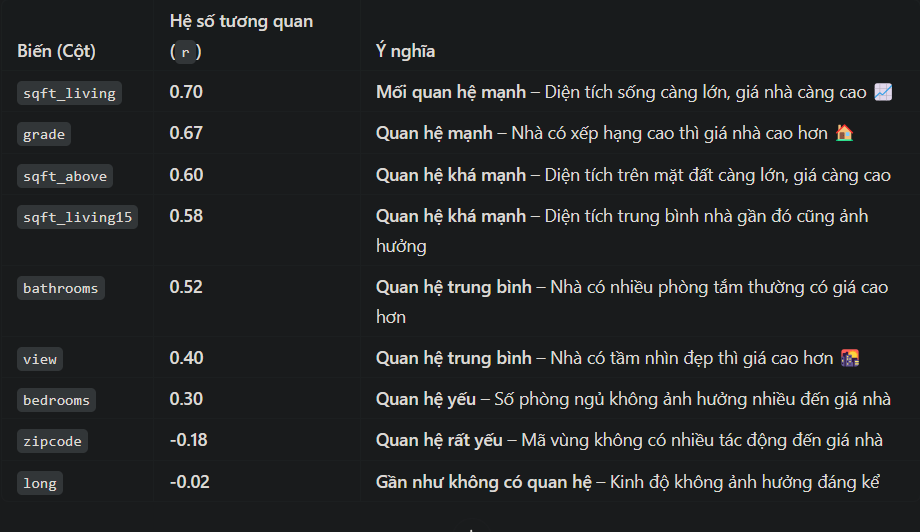

pearson

Ki·ªÉm tra t∆∞∆°ng quan tuy·∫øn t√≠nh gi·ªØa bi·∫øn s·ªë v√† gi√° nh√†
-->D·ªÖ hi·ªÉu, nhanh

ANOVA

Ki·ªÉm tra ·∫£nh h∆∞·ªüng c·ªßa bi·∫øn ph√¢n lo·∫°i ƒë·∫øn gi√° nh√†
T·ªët cho d·ªØ li·ªáu ph√¢n lo·∫°i


# D√πng Boxplot + ANOVA

D√πng ki·ªÉm ƒë·ªãnh ANOVA ƒë·ªÉ xem s·ª± kh√°c bi·ªát v·ªÅ gi√° nh√† gi·ªØa c√°c nh√≥m.

N·∫øu p-value < 0.05 ‚Üí C·ªôt n√†y c√≥ ·∫£nh h∆∞·ªüng ƒë√°ng k·ªÉ ƒë·∫øn gi√° nh√†.

Ki·ªÉm tra ·∫£nh h∆∞·ªüng c·ªßa c√°c c·ªôt d·∫°ng ph√¢n lo·∫°i (waterfront, view, grade, condition, zipcode) ƒë·∫øn gi√° nh√† b·∫±ng bi·ªÉu ƒë·ªì h·ªôp.

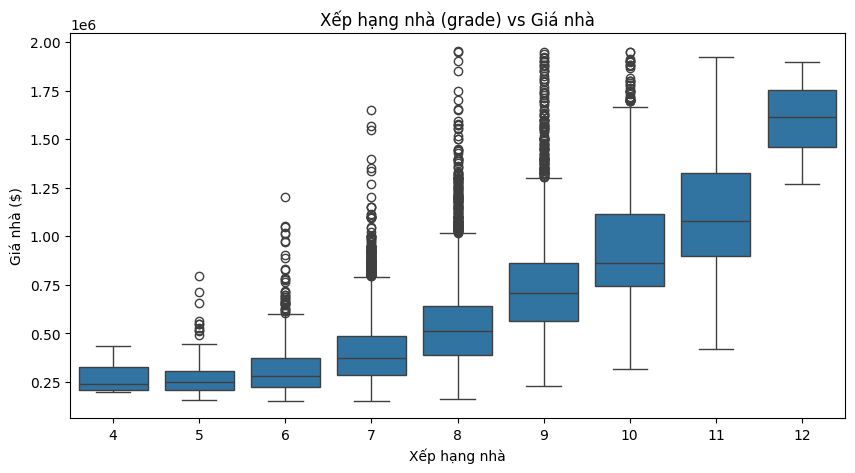

P-value t·ª´ ki·ªÉm ƒë·ªãnh ANOVA: 0.0


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=housing_dataset["grade"], y=housing_dataset["price"])
plt.title("X·∫øp h·∫°ng nh√† (grade) vs Gi√° nh√†")
plt.xlabel("X·∫øp h·∫°ng nh√†")
plt.ylabel("Gi√° nh√† ($)")
plt.show()
anova_result = stats.f_oneway(
    *[housing_dataset[housing_dataset["grade"] == cat]["price"] for cat in housing_dataset["grade"].unique()]
)

print("P-value t·ª´ ki·ªÉm ƒë·ªãnh ANOVA:", anova_result.pvalue)


Gi·∫£i th√≠ch:

Nh√† c√≥ grade cao th√¨ gi√° nh√† c≈©ng cao h∆°n r√µ r·ªát.



Nh√† c√≥ grade th·∫•p (3-4) c√≥ gi√° th·∫•p nh·∫•t.



Nh√† c√≥ grade cao (10-13) c√≥ gi√° r·∫•t cao.



Bi·ªÉu ƒë·ªì c√≥ nhi·ªÅu outlier (ƒëi·ªÉm xa so v·ªõi ph·∫ßn th√¢n boxplot) ‚Üí C√≥ m·ªôt s·ªë nh√† r·∫•t ƒë·∫Øt so v·ªõi nh√≥m c·ªßa ch√∫ng.
--> K·∫øt lu·∫≠n: grade l√† m·ªôt bi·∫øn quan tr·ªçng ·∫£nh h∆∞·ªüng ƒë·∫øn gi√° nh√†.

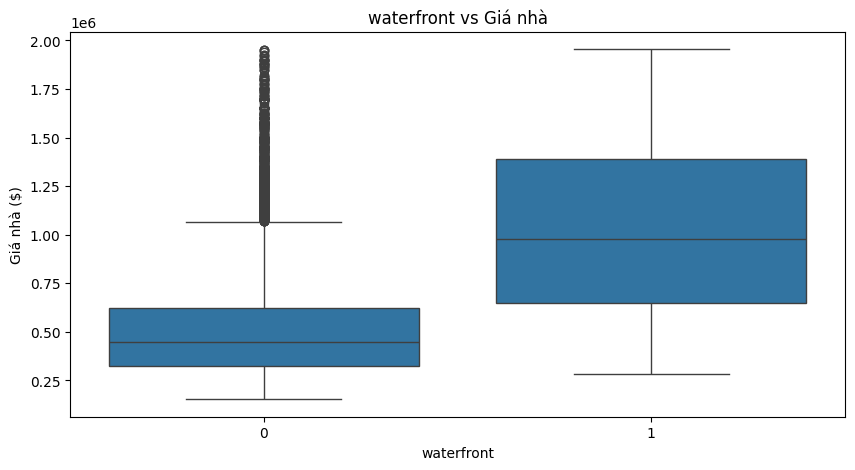

P-value t·ª´ ki·ªÉm ƒë·ªãnh ANOVA: 1.1007608806537202e-99


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=housing_dataset["waterfront"], y=housing_dataset["price"])
plt.title("waterfront vs Gi√° nh√†")
plt.xlabel("waterfront")
plt.ylabel("Gi√° nh√† ($)")
plt.show()

from scipy import stats

anova_result = stats.f_oneway(
    *[housing_dataset[housing_dataset["waterfront"] == cat]["price"] for cat in housing_dataset["waterfront"].unique()]
)

print("P-value t·ª´ ki·ªÉm ƒë·ªãnh ANOVA:", anova_result.pvalue)

Nh√† (waterfront = 1) c√≥ gi√° cao h∆°n nhi·ªÅu so v·ªõi nh√† kh√¥ng g·∫ßn m·∫∑t n∆∞·ªõc (waterfront = 0).
C√≥ s·ª± ch√™nh l·ªách l·ªõn v·ªÅ gi√° gi·ªØa hai nh√≥m.
--> K·∫øt lu·∫≠n: Nh√† waterfrontc c√≥ gi√° tr·ªã cao h∆°n r√µ r·ªát, n√™n waterfront l√† m·ªôt bi·∫øn quan tr·ªçng.

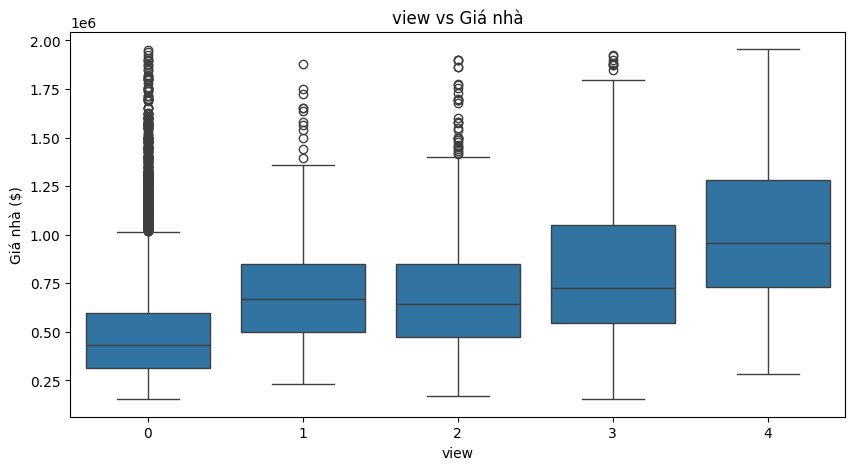

P-value t·ª´ ki·ªÉm ƒë·ªãnh ANOVA: 0.0


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=housing_dataset["view"], y=housing_dataset["price"])
plt.title("view vs Gi√° nh√†")
plt.xlabel("view")
plt.ylabel("Gi√° nh√† ($)")
plt.show()

from scipy import stats

anova_result = stats.f_oneway(
    *[housing_dataset[housing_dataset["view"] == cat]["price"] for cat in housing_dataset["view"].unique()]
)

print("P-value t·ª´ ki·ªÉm ƒë·ªãnh ANOVA:", anova_result.pvalue)

Nh√† c√≥ (view t·ª´ 3 ƒë·∫øn 4) c√≥ gi√° cao h∆°n h·∫≥n so v·ªõi nh√† c√≥ t·∫ßm nh√¨n k√©m (view = 0).
Nh√≥m view = 4  c√≥ gi√° trung b√¨nh cao nh·∫•t.
--> K·∫øt lu·∫≠n: Nh·ªØng nh√† c√≥ view cao th∆∞·ªùng ƒë·∫Øt h∆°n nhi·ªÅu.

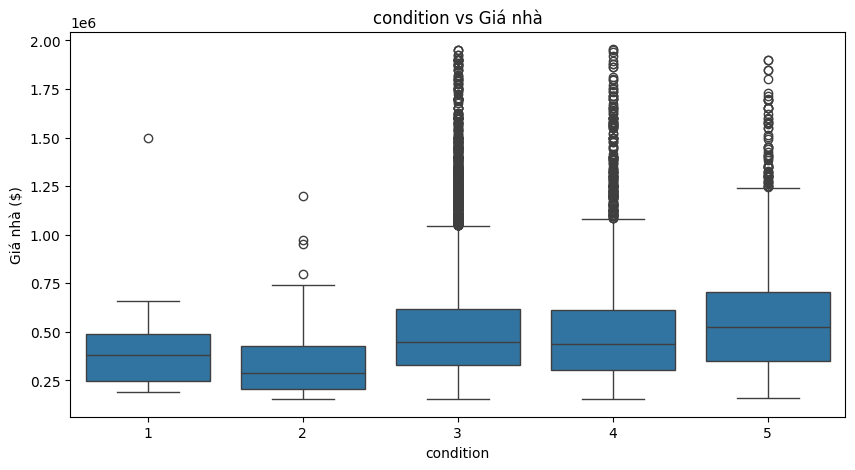

P-value t·ª´ ki·ªÉm ƒë·ªãnh ANOVA: 4.290979960163909e-35


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=housing_dataset["condition"], y=housing_dataset["price"])
plt.title("condition vs Gi√° nh√†")
plt.xlabel("condition")
plt.ylabel("Gi√° nh√† ($)")
plt.show()

from scipy import stats

anova_result = stats.f_oneway(
    *[housing_dataset[housing_dataset["condition"] == cat]["price"] for cat in housing_dataset["condition"].unique()]
)

print("P-value t·ª´ ki·ªÉm ƒë·ªãnh ANOVA:", anova_result.pvalue)

S·ª± ch√™nh l·ªách gi·ªØa c√°c nh√≥m condition kh√¥ng qu√° l·ªõn.
Tuy nhi√™n, nh√† c√≥ condition cao h∆°n (4-5) c√≥ xu h∆∞·ªõng ƒë·∫Øt h∆°n m·ªôt ch√∫t.
--> K·∫øt lu·∫≠n:  (condition) c√≥ ·∫£nh h∆∞·ªüng, nh∆∞ng kh√¥ng m·∫°nh b·∫±ng grade hay view.

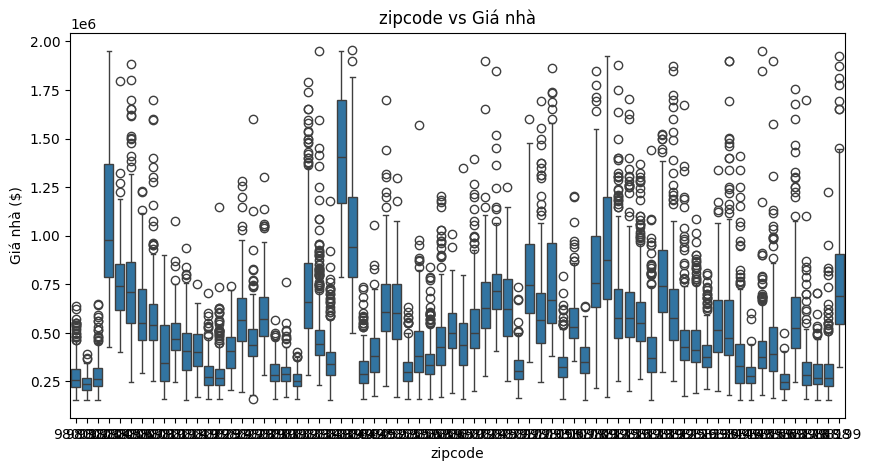

P-value t·ª´ ki·ªÉm ƒë·ªãnh ANOVA: 0.0


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=housing_dataset["zipcode"], y=housing_dataset["price"])
plt.title("zipcode vs Gi√° nh√†")
plt.xlabel("zipcode")
plt.ylabel("Gi√° nh√† ($)")
plt.show()

from scipy import stats

anova_result = stats.f_oneway(
    *[housing_dataset[housing_dataset["zipcode"] == cat]["price"] for cat in housing_dataset["zipcode"].unique()]
)

print("P-value t·ª´ ki·ªÉm ƒë·ªãnh ANOVA:", anova_result.pvalue)

Ph·∫°m vi gi√° nh√† trong t·ª´ng m√£ v√πng v·∫´n r·∫•t l·ªõn, nghƒ©a l√† kh√¥ng c√≥ zipcode n√†o c√≥ m·ª©c gi√° nh√† c·ªë ƒë·ªãnh ho·∫∑c r·∫•t ch·∫∑t ch·∫Ω.

Nhi·ªÅu h·ªôp (box) c√≥ chi·ªÅu cao t∆∞∆°ng t·ª± nhau, nghƒ©a l√† gi√° nh√† bi·∫øn ƒë·ªông kh√° gi·ªëng nhau gi·ªØa c√°c khu v·ª±c.


Nhi·ªÅu outliers ·ªü t·∫•t c·∫£ c√°c zipcode, cho th·∫•y c√≥ nh·ªØng cƒÉn nh√† r·∫•t ƒë·∫Øt trong nhi·ªÅu m√£ v√πng, ch·ª© kh√¥ng ch·ªâ t·∫≠p trung ·ªü m·ªôt v√†i m√£ v√πng c·ª• th·ªÉ.

Ki·ªÉm tra h·ªá s·ªë t∆∞∆°ng quan (correlation coefficient) ƒë·ªÉ xem m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng th·ª±c t·∫ø c·ªßa zipcode ƒë·∫øn gi√° nh√†.
Th·ª≠ bi·∫øn zipcode th√†nh bi·∫øn nh√≥m (categorical variable) v√† ki·ªÉm tra l·∫°i t√°c ƒë·ªông c·ªßa n√≥.

P-value = 0 ch·ªâ ra r·∫±ng gi√° nh√† c√≥ s·ª± kh√°c bi·ªát gi·ªØa c√°c m√£ v√πng v·ªÅ m·∫∑t th·ªëng k√™.

P-value ch·ªâ cho bi·∫øt c√≥ s·ª± kh√°c bi·ªát hay kh√¥ng, kh√¥ng cho bi·∫øt m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng.
M·ªôt p-value nh·ªè kh√¥ng c√≥ nghƒ©a l√† bi·∫øn ƒë√≥ ·∫£nh h∆∞·ªüng m·∫°nh ƒë·∫øn gi√° nh√†, m√† ch·ªâ n√≥i r·∫±ng c√≥ s·ª± kh√°c bi·ªát v·ªÅ m·∫∑t th·ªëng k√™ gi·ªØa c√°c nh√≥m.

P-value ch·ªâ ki·ªÉm tra c√≥ ·∫£nh h∆∞·ªüng hay kh√¥ng, kh√¥ng ƒëo m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng.
ƒê·ªÉ bi·∫øt m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng, c·∫ßn xem th√™m h·ªá s·ªë t∆∞∆°ng quan (Pearson), ƒë·ªô l·ªõn c·ªßa coefficients trong m√¥ h√¨nh h·ªìi quy, ho·∫∑c feature importance trong Random Forest.

ƒë·∫∑c tr∆∞ng ƒë·∫ßu v√†o feature and bi·∫øn m·ª•c ti√™u target

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
            'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
target = 'price'

chia d·ªØ li·ªáu train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(housing_dataset[features],
                                                    housing_dataset[target],
                                                    test_size=0.2,
                                                    random_state=42)

# data process

drop k c·∫ßn thi·∫øt

In [ ]:
housing_dataset = housing_dataset.drop(columns=['date','id'])


Ki·ªÉm tra gi√° tr·ªã thi·∫øu

In [ ]:

missing_values = housing_dataset.isnull().sum()
print(missing_values)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


X·ª≠ l√Ω gi√° tr·ªã thi·∫øu (n·∫øu c√≥)

ƒëi·ªÅn b·∫±ng trung b√¨nh.

In [ ]:
(housing_dataset.fillna(housing_dataset.mean()))

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      231300.0         2       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 19 columns]

ƒëi·ªÅn b·∫±ng trung v·ªã n·∫øu nhi·ªÅu outliers

In [ ]:
housing_dataset.fillna(housing_dataset.median(), inplace=True)


c·ªôt ph√¢n lo·∫°i n·∫øu c√≥ th√¨ thay b·∫±ng ph·ªï bi·∫øn nh·∫•t

In [ ]:
for col in housing_dataset.select_dtypes(include=['object']).columns:
    housing_dataset[col].fillna(housing_dataset[col].mode()[0], inplace=True)



t√¨m d·ªØ li·ªáu tr√πng l·∫∑p

In [ ]:
duplicate_rows = housing_dataset.duplicated()
print(f"S·ªë l∆∞·ª£ng d√≤ng tr√πng l·∫∑p: {duplicate_rows.sum()}")

S·ªë l∆∞·ª£ng d√≤ng tr√πng l·∫∑p: 5


x·ª≠ l√Ω tr√πng l·∫∑p.

In [ ]:
housing_dataset[housing_dataset.duplicated()]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
3951   550000.0         4       1.75         2410      8447     2.0   
4352   259950.0         2       2.00         1070       649     2.0   
14983  585000.0         3       2.50         2290      5089     2.0   
20054  555000.0         3       2.50         1940      3211     2.0   
20524  529500.0         3       2.25         1410       905     3.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
3951            0     3          4      8        2060            350   
4352            0     0          3      9         720            350   
14983           0     0          3      9        2290              0   
20054           0     0          3      8        1940              0   
20524           0     0          3      9        1410              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
3951       1936          1980    98074  47.6499 -122.088           2520   
4352       2008             0    98106  47.5213 -122.357           1070   
14983      2001             0    98006  47.5443 -122.172           2290   
20054      2009             0    98027  47.5644 -122.093           1880   
20524      2014             0    98116  47.5818 -122.402           1510   

       sqft_lot15  
3951        14789  
4352          928  
14983        7984  
20054        3078  
20524        1352

In [ ]:
housing_dataset = housing_dataset.drop_duplicates()
print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi lo·∫°i b·ªè tr√πng l·∫∑p: {housing_dataset.shape}")


K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi lo·∫°i b·ªè tr√πng l·∫∑p: (21608, 19)


lo·∫°i b·ªè c√°c d·ªØ li·ªáu c√≥ kh·∫£ lƒÉng sai l·ªách

In [ ]:
housing_dataset = housing_dataset[housing_dataset["floors"] > 0]


lo·∫°i b·ªè c√°c gi√° tr·ªã ngo·∫°i lai (theo ph√¢n v·ªã 1% v√† 99%)

In [ ]:
for col in ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']:
    lower_bound = housing_dataset[col].quantile(0.01)
    upper_bound = housing_dataset[col].quantile(0.99)
    housing_dataset = housing_dataset[(housing_dataset[col]>=lower_bound)&(housing_dataset[col]<=upper_bound)]

N·∫øu c√≥ c·ªôt d·∫°ng ch·ªØ (object), chuy·ªÉn th√†nh s·ªë b·∫±ng Label Encoding

In [ ]:

label_encoders = {}
for col in housing_dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    housing_dataset[col] = le.fit_transform(housing_dataset[col])
    label_encoders[col] = le


m√£ h√≥a bi·∫øn ph√¢n lo·∫°i c·ªßa linear res. b·ªè ƒëi c≈©ng dk ho·∫∑c ƒë·ªÉ l·∫°i so s√°nh.

In [ ]:

data = pd.get_dummies(housing_dataset, columns=['waterfront',
                                                'view',
                                                'condition',
                                                'grade',
                                                'zipcode'],
                      drop_first=True)

C√°c bi·∫øn n√†y l√† categorical variables (bi·∫øn ph√¢n lo·∫°i) v√¨ ch√∫ng ƒë·∫°i di·ªán cho c√°c nh√≥m ho·∫∑c danh m·ª•c kh√°c nhau, thay v√¨ l√† gi√° tr·ªã li√™n t·ª•c. H√£y c√πng ph√¢n t√≠ch t·ª´ng bi·∫øn:

waterfront (M·∫∑t n∆∞·ªõc g·∫ßn nh√†)

Ch·ªâ c√≥ 2 gi√° tr·ªã: C√≥ (1) ho·∫∑c Kh√¥ng (0).
ƒê√¢y l√† bi·∫øn ph√¢n lo·∫°i nh·ªã ph√¢n (binary categorical variable).

D√πng One-Hot Encoding (drop_first=True) ƒë·ªÉ chuy·ªÉn th√†nh 1 c·ªôt nh·ªã ph√¢n (0 ho·∫∑c 1).

view (T·∫ßm nh√¨n c·ªßa nh√†)

Gi√° tr·ªã th∆∞·ªùng l√†: 0 (Kh√¥ng c√≥ view), 1, 2, 3, 4 (view ƒë·∫πp h∆°n).

ƒê√¢y l√† bi·∫øn ph√¢n lo·∫°i th·ª© b·∫≠c (ordinal categorical variable), v√¨ s·ªë l·ªõn h∆°n c√≥ th·ªÉ c√≥ √Ω nghƒ©a t·ªët h∆°n.

N·∫øu m√¥ h√¨nh hi·ªÉu ƒë∆∞·ª£c th·ª© t·ª±, c√≥ th·ªÉ gi·ªØ nguy√™n s·ªë ho·∫∑c d√πng Label Encoding thay v√¨ One-Hot Encoding.

condition (T√¨nh tr·∫°ng nh√†)

C√°c gi√° tr·ªã th∆∞·ªùng l√† 1, 2, 3, 4, 5 (t·ª´ x·∫•u nh·∫•t ƒë·∫øn t·ªët nh·∫•t).

ƒê√¢y c≈©ng l√† bi·∫øn ph√¢n lo·∫°i c√≥ th·ª© b·∫≠c.
C√≥ th·ªÉ gi·ªØ nguy√™n gi√° tr·ªã s·ªë ho·∫∑c m√£ h√≥a b·∫±ng One-Hot Encoding n·∫øu c·∫ßn.

grade (X·∫øp h·∫°ng ch·∫•t l∆∞·ª£ng nh√†)

Gi√° tr·ªã t·ª´ 1 ƒë·∫øn 13 (x·∫øp h·∫°ng theo h·ªá th·ªëng).

C√≥ th·ª© t·ª± n√™n c√≥ th·ªÉ gi·ªØ nguy√™n gi√° tr·ªã ho·∫∑c d√πng One-Hot Encoding.

 zipcode (M√£ v√πng)

M·∫∑c d√π c√≥ d·∫°ng s·ªë (98001, 98002, ...) nh∆∞ng m√£ v√πng kh√¥ng c√≥ √Ω nghƒ©a to√°n h·ªçc.
ƒê√¢y l√† bi·∫øn ph√¢n lo·∫°i danh m·ª•c (nominal categorical variable), v√¨ m√£ v√πng ch·ªâ l√† m·ªôt nh√£n, kh√¥ng c√≥ th·ª© t·ª±.

B·∫Øt bu·ªôc ph·∫£i m√£ h√≥a (One-Hot Encoding ho·∫∑c Target Encoding).

 T√≥m l·∫°i:

C√°c bi·∫øn n√†y kh√¥ng ph·∫£i s·ªë li√™n t·ª•c m√† l√† c√°c nh√≥m danh m·ª•c ‚Üí C·∫ßn m√£ h√≥a tr∆∞·ªõc khi ƒë∆∞a v√†o m√¥ h√¨nh.

One-Hot Encoding (pd.get_dummies) l√† h·ª£p l√Ω, nh∆∞ng n·∫øu c√≥ qu√° nhi·ªÅu gi√° tr·ªã trong zipcode, n√™n th·ª≠ Target Encoding ƒë·ªÉ gi·∫£m s·ªë chi·ªÅu d·ªØ li·ªáu.

Random Forest l√† m√¥ h√¨nh d·ª±a tr√™n c√¢y quy·∫øt ƒë·ªãnh (Decision Trees), ho·∫°t ƒë·ªông b·∫±ng c√°ch chia d·ªØ li·ªáu d·ª±a tr√™n ƒëi·ªÅu ki·ªán so s√°nh gi√° tr·ªã, kh√¥ng ph·∫£i kho·∫£ng c√°ch gi·ªØa c√°c ƒëi·ªÉm d·ªØ li·ªáu.
üîπ Do ƒë√≥, d·ªØ li·ªáu kh√¥ng c·∫ßn ph·∫£i ƒë∆∞·ª£c chu·∫©n h√≥a (Normalization) ho·∫∑c chu·∫©n h√≥a theo ph√¢n ph·ªëi chu·∫©n (Standardization) nh∆∞ c√°c m√¥ h√¨nh d·ª±a tr√™n kho·∫£ng c√°ch (v√≠ d·ª•: k-NN, SVM).

# build linear res

ph·∫∑c c√°i n√†y k t·ªëi ∆∞u ƒë·ªïi s√†n forest. x√≥a cmn ƒëi c≈©ng dk.

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

t√©t

In [ ]:
y_pred_lr = lr_model.predict(X_test)

√¥i vl to v·∫£i nho.

In [ ]:
lr_mse = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {lr_mse}")

Linear Regression Mean Squared Error: 21353247140.72844


In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr) ** 0.5

ph·∫∑c to.

In [ ]:
print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}")

Linear Regression - MAE: 103157.23821416612, RMSE: 146127.5030263928


#build random forest model.

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

t√©t

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {rf_mse}")

Random Forest Mean Squared Error: 9080097073.84795


In [ ]:

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
r2_selected = r2_score(y_test, y_pred_rf)


In [ ]:
print(f"R¬≤ Score: {r2_selected:.3f}")
print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}")

R¬≤ Score: 0.861
Random Forest - MAE: 59820.686163030354, RMSE: 95289.54336047555


L√†m sao ƒë·ªÉ ti·∫øp c·∫≠n ƒë√°nh gi√° m√¥ h√¨nh hi·ªáu qu·∫£?

Ki·ªÉm tra R¬≤ tr∆∞·ªõc

N·∫øu R¬≤ th·∫•p (< 0.5) ‚Üí C·∫ßn ki·ªÉm tra l·∫°i m√¥ h√¨nh, c√≥ th·ªÉ ch∆∞a ƒë·ªß bi·∫øn quan tr·ªçng.

N·∫øu R¬≤ cao (> 0.8) ‚Üí M√¥ h√¨nh c√≥ th·ªÉ ho·∫°t ƒë·ªông t·ªët, nh∆∞ng c·∫ßn ki·ªÉm tra sai s·ªë.

 Ki·ªÉm tra RMSE v√† MAE

N·∫øu RMSE >> MAE, c√≥ th·ªÉ d·ªØ li·ªáu c√≥ ngo·∫°i lai ·∫£nh h∆∞·ªüng ƒë·∫øn m√¥ h√¨nh.

N·∫øu RMSE ‚âà MAE, d·ªØ li·ªáu c√≥ ph√¢n ph·ªëi ·ªïn ƒë·ªãnh, kh√¥ng c√≥ nhi·ªÅu ngo·∫°i lai.

 So s√°nh v·ªõi gi√° tr·ªã th·ª±c t·∫ø

N·∫øu gi√° tr·ªã RMSE/MAE l·ªõn so v·ªõi trung b√¨nh c·ªßa bi·∫øn m·ª•c ti√™u, th√¨ m√¥ h√¨nh c·∫ßn c·∫£i thi·ªán.

V√≠ d·ª•, n·∫øu gi√° nh√† trung b√¨nh l√† 300,000 nh∆∞ng RMSE = 100,000, th√¨ sai s·ªë kh√° l·ªõn.

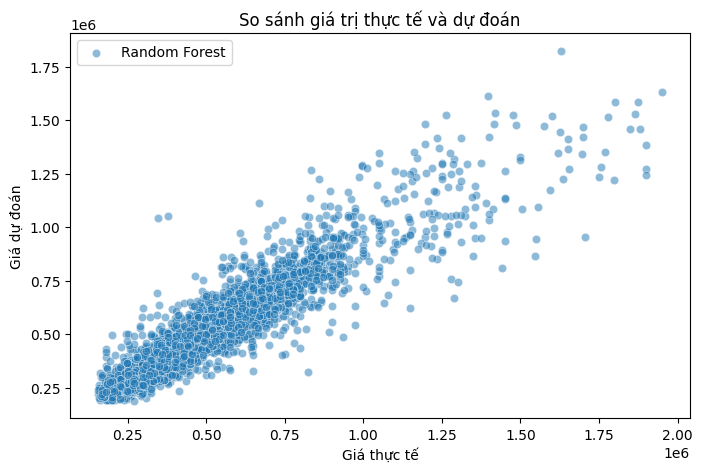

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, label='Random Forest')
#sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5, label='Linear Regression')
plt.xlabel("Gi√° th·ª±c t·∫ø")
plt.ylabel("Gi√° d·ª± ƒëo√°n")
plt.title("So s√°nh gi√° tr·ªã th·ª±c t·∫ø v√† d·ª± ƒëo√°n")
plt.legend()
plt.show()

In [ ]:
print("Linear Regression predict:")
print(y_pred_lr[:10])



Linear Regression predict:
[549804.05901404 513064.2849634  591499.56595335 274102.4733174
 273989.31296859 218388.80422193 436006.48373254 240129.96196275
 575355.61435825 344153.2330551 ]


In [ ]:

print("Random Forest predict:")
print(y_pred_rf[:10])


Random Forest predict:
[490477.5  388473.   423418.67 246202.   329726.85 359512.36 377955.06
 250243.   436088.42 268176.9 ]


In [ ]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Linear Regression': y_pred_lr, 'Random Forest': y_pred_rf})
predictions_df.to_csv("/mnt/data/predictions.csv", index=False)
print("predictions.csv")


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
# ƒê·ªãnh nghƒ©a t·∫≠p h·ª£p c√°c tham s·ªë ƒë·ªÉ RandomizedSearchCV th·ª≠ nghi·ªám
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Kh·ªüi t·∫°o m√¥ h√¨nh
rf = RandomForestRegressor(random_state=42)

# S·ª≠ d·ª•ng RandomizedSearchCV ƒë·ªÉ t√¨m b·ªô tham s·ªë t·ªëi ∆∞u
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2, n_jobs=-1, scoring='r2', random_state=42
)

# Hu·∫•n luy·ªán m√¥ h√¨nh
random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print("Best Parameters:", best_params)


best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)


cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R2 scores:", cv_scores)
print("Mean CV R2 Score:", cv_scores.mean())


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': True}
Cross-validation R2 scores: [0.86299222 0.85422361 0.85742155 0.87828591 0.866388  ]
Mean CV R2 Score: 0.8638622586943348


In [ ]:
# D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra
y_pred = best_rf.predict(X_test)

# T√≠nh c√°c ch·ªâ s·ªë ƒë√°nh gi√°
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R2 Score: 0.8617
Mean Absolute Error (MAE): 59548.5136
Root Mean Squared Error (RMSE): 95080.3957


In [ ]:
# T√≠nh R2 tr√™n t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
r2_train = best_rf.score(X_train, y_train)
r2_test = best_rf.score(X_test, y_test)

print(f"Training R2 Score: {r2_train:.4f}")
print(f"Testing R2 Score: {r2_test:.4f}")

# Ki·ªÉm tra m·ª©c ƒë·ªô overfitting
if r2_train - r2_test > 0.1:
    print("‚ö†Ô∏è M√¥ h√¨nh c√≥ d·∫•u hi·ªáu overfitting! H√£y th·ª≠ ƒëi·ªÅu ch·ªânh tham s·ªë.")
elif r2_train < r2_test:
    print("‚úÖ M√¥ h√¨nh c√≥ v·∫ª ƒëang underfitting. H√£y th·ª≠ tƒÉng ƒë·ªô ph·ª©c t·∫°p.")
else:
    print("‚úÖ M√¥ h√¨nh c√≥ ƒë·ªô kh·ªõp t·ªët gi·ªØa train/test.")


Training R2 Score: 0.9590
Testing R2 Score: 0.8573
‚ö†Ô∏è M√¥ h√¨nh c√≥ d·∫•u hi·ªáu overfitting! H√£y th·ª≠ ƒëi·ªÅu ch·ªânh tham s·ªë.


In [ ]:



# ƒêi·ªÅu ch·ªânh l·∫°i t·∫≠p h·ª£p tham s·ªë ƒë·ªÉ gi·∫£m overfitting
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Gi·∫£m s·ªë l∆∞·ª£ng c√¢y ƒë·ªÉ tr√°nh overfitting
    'max_depth': [5, 10, 15],             # Gi·∫£m ƒë·ªô s√¢u ƒë·ªÉ tr√°nh h·ªçc qu√° k·ªπ
    'min_samples_split': [10, 15, 20],    # Y√™u c·∫ßu s·ªë l∆∞·ª£ng m·∫´u cao h∆°n ƒë·ªÉ chia
    'min_samples_leaf': [5, 10],          # M·ªói l√° c·∫ßn √≠t nh·∫•t 5-10 m·∫´u
    'max_features': ['sqrt', 'log2'],     # H·∫°n ch·∫ø s·ªë l∆∞·ª£ng ƒë·∫∑c tr∆∞ng m·ªói c√¢y c√≥ th·ªÉ h·ªçc
    'bootstrap': [True]                    # Gi·ªØ bootstrap ƒë·ªÉ ƒëa d·∫°ng d·ªØ li·ªáu
}

# Kh·ªüi t·∫°o m√¥ h√¨nh
rf = RandomForestRegressor(random_state=42)

# S·ª≠ d·ª•ng RandomizedSearchCV ƒë·ªÉ t√¨m b·ªô tham s·ªë t·ªëi ∆∞u
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2, n_jobs=-1, scoring='r2', random_state=42
)

# Hu·∫•n luy·ªán m√¥ h√¨nh
random_search.fit(X_train, y_train)

# L·∫•y tham s·ªë t·ªëi ∆∞u
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Hu·∫•n luy·ªán l·∫°i v·ªõi tham s·ªë t·ªëi ∆∞u
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# ƒê√°nh gi√° tr√™n t·∫≠p train v√† test
r2_train = best_rf.score(X_train, y_train)
r2_test = best_rf.score(X_test, y_test)

print(f"Training R2 Score: {r2_train:.4f}")
print(f"Testing R2 Score: {r2_test:.4f}")

# Ki·ªÉm tra m·ª©c ƒë·ªô overfitting
if r2_train - r2_test > 0.1:
    print("‚ö†Ô∏è M√¥ h√¨nh v·∫´n b·ªã overfitting! C·∫ßn th·ª≠ th√™m k·ªπ thu·∫≠t kh√°c.")
else:
    print("‚úÖ M√¥ h√¨nh c√≥ ƒë·ªô kh·ªõp t·ªët gi·ªØa train/test.")

# ƒê√°nh gi√° m√¥ h√¨nh b·∫±ng cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R2 scores:", cv_scores)
print("Mean CV R2 Score:", cv_scores.mean())



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
Training R2 Score: 0.9104
Testing R2 Score: 0.8358
‚úÖ M√¥ h√¨nh c√≥ ƒë·ªô kh·ªõp t·ªët gi·ªØa train/test.
Cross-validation R2 scores: [0.83815425 0.83911371 0.83284278 0.85272898 0.84031776]
Mean CV R2 Score: 0.8406314964289491


In [ ]:
y_pred = best_rf.predict(X_test)

# T√≠nh c√°c ch·ªâ s·ªë ƒë√°nh gi√°
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R¬≤ Score: 0.8358
Mean Absolute Error (MAE): 64465.7804
Root Mean Squared Error (RMSE): 103612.5433


In [ ]:
# Importing additional libraries
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

# Define a pipeline
pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_regression, k=10)),  # Select top 10 features
    ('random_search', RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                         n_iter=20, cv=5, verbose=2, n_jobs=-1,
                                         scoring='r2', random_state=42))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Get the best parameters
best_params = pipeline.named_steps['random_search'].best_params_
print("Best Parameters:", best_params)

# Retrain with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R2 scores:", cv_scores)
print("Mean CV R2 Score:", cv_scores.mean())


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
Cross-validation R2 scores: [0.83815425 0.83911371 0.83284278 0.85272898 0.84031776]
Mean CV R2 Score: 0.8406314964289491


In [ ]:
# ƒê√°nh gi√° b·∫±ng Cross-Validation
cv_scores_selected = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

# Calculate R-squared for training and testing sets
r2_train_selected = best_rf.score(X_train, y_train)
r2_test_selected = best_rf.score(X_test, y_test)

# In k·∫øt qu·∫£
print("Train R¬≤ Score:", r2_train_selected)
print("Test R¬≤ Score:", r2_test_selected)
print("Cross-validation R¬≤ Scores:", cv_scores_selected)
print("Mean Cross-validation R¬≤ Score:", cv_scores_selected.mean())

# Ki·ªÉm tra overfitting
if r2_train_selected - r2_test_selected > 0.1 or r2_train_selected - cv_scores_selected.mean() > 0.1:
    print("‚ö†Ô∏è M√¥ h√¨nh c√≥ d·∫•u hi·ªáu overfitting!")
else:
    print("‚úÖ M√¥ h√¨nh t·ªïng qu√°t t·ªët, kh√¥ng b·ªã overfitting.")

Train R¬≤ Score: 0.9103840459693783
Test R¬≤ Score: 0.835791180713719
Cross-validation R¬≤ Scores: [0.83815425 0.83911371 0.83284278 0.85272898 0.84031776]
Mean Cross-validation R¬≤ Score: 0.8406314964289491
‚úÖ M√¥ h√¨nh t·ªïng qu√°t t·ªët, kh√¥ng b·ªã overfitting.


Gi·∫£m overfitting

TƒÉng min_samples_split ho·∫∑c min_samples_leaf ƒë·ªÉ tr√°nh c√¢y qu√° s√¢u.

Gi·∫£m s·ªë l∆∞·ª£ng c√¢y (n_estimators) n·∫øu c·∫ßn c·∫£i thi·ªán t·ªëc ƒë·ªô.
S·ª≠ d·ª•ng k·ªπ thu·∫≠t Regularization nh∆∞ pruning ho·∫∑c Dropout n·∫øu th·ª≠ nghi·ªám m·∫°ng n∆°-ron.

 Th·ª≠ c√°c m√¥ h√¨nh kh√°c ƒë·ªÉ so s√°nh

XGBoost ho·∫∑c LightGBM c√≥ th·ªÉ mang l·∫°i hi·ªáu su·∫•t t·ªët h∆°n.

Deep Learning (Neural Networks) n·∫øu c√≥ d·ªØ li·ªáu l·ªõn h∆°n.

 C·∫£i thi·ªán t·∫≠p d·ªØ li·ªáu

B·ªï sung th√™m bi·∫øn quan tr·ªçng: v√≠ d·ª• nh∆∞ kho·∫£ng c√°ch ƒë·∫øn trung t√¢m, ch·∫•t l∆∞·ª£ng ti·ªán √≠ch xung quanh.

Lo·∫°i b·ªè outliers b·∫±ng c√°ch s·ª≠ d·ª•ng k·ªπ thu·∫≠t th·ªëng k√™ ho·∫∑c visualization.

Feature Selection ƒë·ªÉ tƒÉng hi·ªáu qu·∫£ m√¥ h√¨nh

D√πng SHAP values ho·∫∑c Recursive Feature Elimination (RFE) ƒë·ªÉ ch·ªçn ra c√°c bi·∫øn quan tr·ªçng nh·∫•t.

S·ª≠ d·ª•ng Bayesian Optimization ho·∫∑c GridSearchCV ƒë·ªÉ t·ªëi ∆∞u hyperparameter

T√¨m b·ªô si√™u tham s·ªë t·ªëi ∆∞u thay v√¨ ch·ªâ th·ª≠ nghi·ªám ng·∫´u nhi√™n.
